In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

plt.style.use('seaborn-whitegrid')
df = pd.read_csv('./input/fe-course-data/autos.csv')
 

X = df.copy()
y = X.pop('price')

# Label encoding for categories
print(X.dtypes)
# for colname in X.select_dtypes(include='object'):
#     X[colname],_=X[colname].factorize()
print('1' * 100)
print(X.select_dtypes(include='object'))

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
            make fuel_type aspiration   body_style drive_wheels  \
0    alfa-romero       gas        std  convertible          rwd   
1    alfa-romero       gas        std  convertible     

In [2]:

print('2' * 100)
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222


In [3]:

print('3' * 100)
print(X.head())
discrete_features = X.dtypes == int


3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
   symboling  make  fuel_type  aspiration  num_of_doors  body_style  \
0          3     0          0           0             2           0   
1          3     0          0           0             2           0   
2          1     0          0           0             2           1   
3          2     1          0           0             4           2   
4          2     1          0           0             4           2   

   drive_wheels  engine_location  wheel_base  length  ...  num_of_cylinders  \
0             0                0        88.6   168.8  ...                 4   
1             0                0        88.6   168.8  ...                 4   
2             0                0        94.5   171.2  ...                 6   
3             1                0        99.8   176.6  ...                 4   
4             2                0        99.4   176.6  ...                 5  

In [4]:

from sklearn.feature_selection import mutual_info_regression

print('4' * 100)



4444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444


In [5]:

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    print(mi_scores)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


mis_scores = make_mi_scores(X, y, discrete_features)
print(mis_scores[::3])

symboling            0.228428
make                 0.545816
fuel_type            0.047279
aspiration           0.087755
num_of_doors         0.012234
body_style           0.081028
drive_wheels         0.332645
engine_location      0.035905
wheel_base           0.590130
length               0.607064
width                0.667237
height               0.354973
curb_weight          1.548038
engine_type          0.150219
num_of_cylinders     0.332501
engine_size          0.999673
fuel_system          0.480416
bore                 0.488476
stroke               0.388539
compression_ratio    0.134109
horsepower           1.255495
peak_rpm             0.447752
city_mpg             0.859977
highway_mpg          0.956541
Name: MI Scores, dtype: float64
curb_weight          1.548038
highway_mpg          0.956541
length               0.607064
bore                 0.488476
stroke               0.388539
num_of_cylinders     0.332501
compression_ratio    0.134109
fuel_type            0.047279
Name: MI

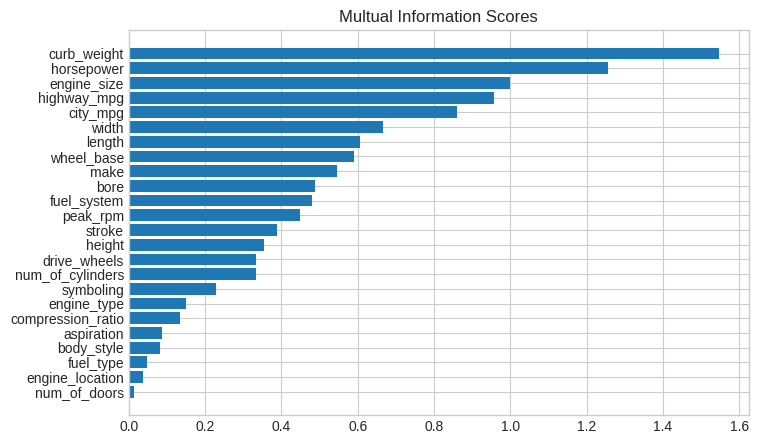

In [6]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Multual Information Scores')


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(scores=mis_scores)
 

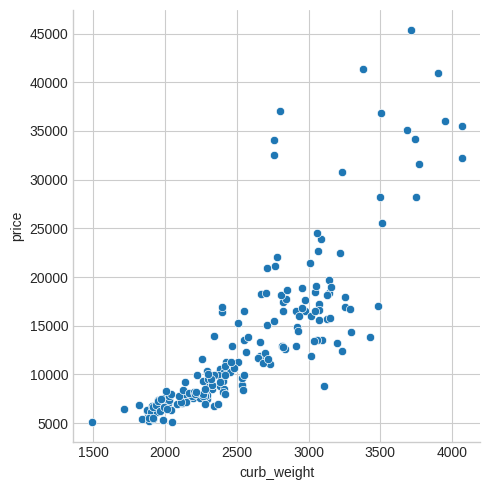

In [8]:
import seaborn as sns

sns.relplot(x='curb_weight',y='price',data=df)

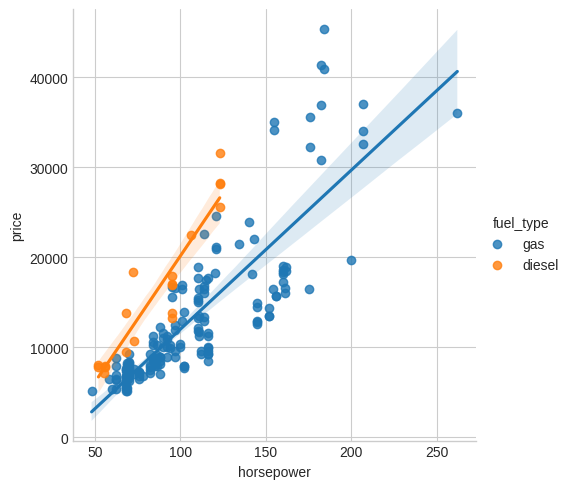

In [9]:
sns.lmplot(x='horsepower',y='price',hue='fuel_type',data=df)